In [28]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [29]:
df_house = pd.read_csv('House Price Prediction Dataset.csv')

In [30]:
df_house.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [31]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [32]:
print('Sum of Null values:')
df_house.isna().sum()

Sum of Null values:


Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

### Feature Selection

In [33]:
df_house2 = df_house[['Area', 'Bedrooms', 'Bathrooms', 
          'Floors', 'Location', 'Condition', 'Garage', 'Price']]

In [34]:
df_house2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   Location   2000 non-null   object
 5   Condition  2000 non-null   object
 6   Garage     2000 non-null   object
 7   Price      2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB


In [35]:
df_house2.head()

,Area,Bedrooms,Bathrooms,Floors,Location,Condition,Garage,Price
0,1360,5,4,3,Downtown,Excellent,No,149919
1,4272,5,4,3,Downtown,Excellent,No,424998
2,3592,2,2,3,Downtown,Good,No,266746
3,966,4,2,2,Suburban,Fair,Yes,244020
4,4926,1,4,2,Downtown,Fair,Yes,636056


In [36]:
df_house2['Location'].value_counts()

Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64

In [37]:
object_column = list(df_house2.columns)[4: -1]

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in object_column:
    df_house2[col] = le.fit_transform(df_house2[col])
    

In [39]:
df_house2.head()

,Area,Bedrooms,Bathrooms,Floors,Location,Condition,Garage,Price
0,1360,5,4,3,0,0,0,149919
1,4272,5,4,3,0,0,0,424998
2,3592,2,2,3,0,2,0,266746
3,966,4,2,2,2,1,1,244020
4,4926,1,4,2,0,1,1,636056


In [40]:
df_house2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       2000 non-null   int64
 1   Bedrooms   2000 non-null   int64
 2   Bathrooms  2000 non-null   int64
 3   Floors     2000 non-null   int64
 4   Location   2000 non-null   int64
 5   Condition  2000 non-null   int64
 6   Garage     2000 non-null   int64
 7   Price      2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


<Axes: >

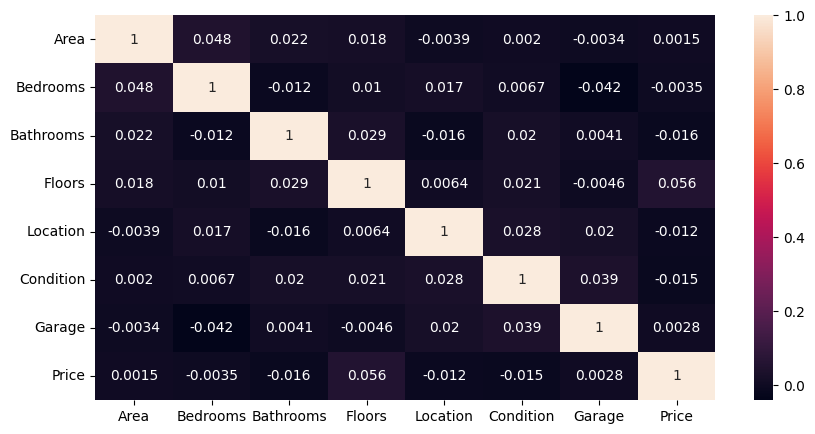

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
sns.heatmap(df_house2.corr(), annot = True)


In [47]:
x = df_house2[list(df_house2.columns)[0: -1]]

In [48]:
y = df_house2['Price']

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01)

In [65]:
print('Training input:', x_train.shape)
print('Training output:', y_train.shape)
print('Testing input:', x_test.shape)
print('Testing output:', y_test.shape)

Training input: (1980, 7)
Training output: (1980,)
Testing input: (20, 7)
Testing output: (20,)


In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
pred = model.predict(x_test)

In [68]:
from sklearn.metrics import mean_absolute_error

print('MAE (Error):',round(mean_absolute_error(y_test, pred), 2))

MAE (Error): 185160.03


In [69]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
print('MAE (Error)-RF:',round(mean_absolute_error(y_test, pred2)), 2)

MAE (Error)-RF: 177955 2


In [70]:
from sklearn.svm import SVR

model2 = SVR()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
print('MAE (Error)-SVR:',round(mean_absolute_error(y_test, pred2), 2))

MAE (Error)-SVR: 188642.99
